Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

-------------
# Exercise 1
# (a)
Let $Q$ be a real, square orthogonal matrix. Show that all eigenvalues of $Q$ satisfy $|\lambda |=1$.

If $\lambda$ is an eigenvalue of Q with corresponding eigenvector $x$, $Qx = \lambda x$. This would mean that $||Qx||_2 = ||\lambda x||_2$, and since an orthogonal matrix preserves the 2-norm, we have $||x||_2 = \lambda \cdot ||x||_2$, which would mean that $|\lambda| = 1$.


# (b)
A projection matrix is a matrix $P$ for which $P^2=P$. Find the eigenvalues of a projection matrix.

If $\lambda$ is an eigenvalue of P with corresponding eigenvector $x$, $Px = \lambda x$. This would mean that $P^2x = \lambda Px = \lambda^2 x$. This means that $\lambda^2$ is an eigenvalue of $P^2$. If $P = P^2$, the eigenvalues are thus such that $\lambda^2 = \lambda$. The only possible values which satisfy this are 0 and 1.

-----------
# Exercise 2
Generate a symmetric $4 × 4$ matrix $A$ randomly, e.g. as below.
Implement Rayleigh quotient iteration (Algorithm 4.4) to compute the largest eigenvalue and corresponding eigenvector of $A$. Use a suitable stopping criterion for your iterations (and explain why you think it is suitable). You may use `scipy.linalg.solve`.

If $x$ is an approximate eigenvector for a real matrix $A$, then determining the best estimate for the corresponding eigenvalue $\lambda$ can be considered as an $n \times 1$ linear least squares approximate problem: $x \lambda \cong Ax$. The matrix has a normal equation $x^Tx\lambda = x^TAx$ and from this we can see that the least squares solution is given by:

$$
\lambda = \frac{x^TAx}{x^Tx}
$$

This quantity is known as the *Rayleigh quotient* and can be used to accelerate the convergence of a method such as power iteration, since at iteration *k* 

In [35]:
import numpy as np
B = np.random.randn(4,4)
A = B+B.T
#A = np.array([[3.,1.], [1., 3.]])
I = np.eye(A.shape[0])
# Need to add in a check to make sure the matrix is ok, sometimes it crashes
#print(I)
#print(A)

x = np.random.rand(A.shape[0],1)

escbreak = True

prev_sigma = 0

while escbreak:
    
    xT = x.T
    # compute shift
    sigma = xT.dot(A.dot(x))/(xT.dot(x))
    left = (A - sigma*I)
    
    # generate next vector
    ycur = np.linalg.solve(left, x)
    
    # normalize the vector
    x = ycur/np.linalg.norm(ycur, ord = np.inf)

    # check to see if the loop should break 
    if abs(prev_sigma - sigma) < 0.0001:
        escbreak = False
    prev_sigma = sigma
    
# print the matrix, eignvalue and eigenvector
print("For the matrix: \n", A)
print("The dominant Eigenvalue is approx: ", sigma)
print("The dominant Eigenvector is approx: \n", x)

For the matrix: 
 [[ 0.17557022  1.97204743  0.04984616 -0.0719916 ]
 [ 1.97204743  0.60641007 -0.28521595  0.80873456]
 [ 0.04984616 -0.28521595 -1.00656254 -0.88947481]
 [-0.0719916   0.80873456 -0.88947481  2.2453198 ]]
The dominant Eigenvalue is approx:  [[3.05520217]]
The dominant Eigenvector is approx: 
 [[-0.4855583 ]
 [-0.75224989]
 [ 0.26585126]
 [-1.        ]]


In order to determine a stopping point, a number of methods were discussed. The first and most obvious is that if the value of sigma is not changing much (i.e. less that 0.0001).  This would indicated convergence and was the method used.  Another stopping point would be to stop the system when the determinent of $A-\sigma I$ becomes 0 as that would indicate that it is singular and that we have found the eigenvalue.  This could be dangerous though if the system does not converge to the exact eigenvalue quickly.  One more method discussed was checking to see if $Ax = \lambda x$ was approximatly true.  This could have been implamented but would have been more complex than a check on thee previous value so it was not implamented.

-------------
# Exercise 3
Let $A$ be a $n × n$ tridiagonal matrix that results (up to an overall constant scaling factor) from an
$n$-point spatial discretization of the Laplace operator in $1$ spatial dimension. Specifically, all diagonal
elements of $A$ have the value $-2$, all elements just below or above the diagonal have value $1$.

$${\displaystyle A = \left( \begin{array}{rrrrr} -2 &  1  &  0 &  0& \ldots \\ 1  & -2 & 1 & 0 &\ldots   \\ 0 & 1 & -2 &  1 &\ldots \\ \vdots & & & & \ddots \end{array} \right) \,}$$



Take $n = 150$. Use `scipy.linalg.qr` to implement Algorithm 4.7 from the book and compute the full eigenvalue spectrum of $A$. Compare against
the eigenvalues obtained by the built-in routine `scipy.linalg.eig(A)`. Show in a figure the (approximate)
eigenvalues after 10, 100 and 500 QR iterations, as well as the eigenvalues obtained with `eig(A)`.


/home/jordan/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:769: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/jordan/.local/lib/python3.6/site-packages/matplotlib/transforms.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/jordan/.local/lib/python3.6/site-packages/matplotlib/transforms.py:2010: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


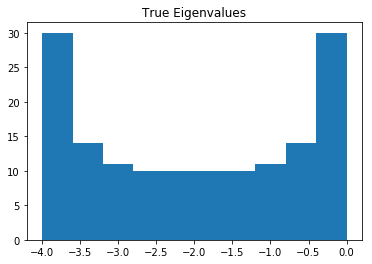

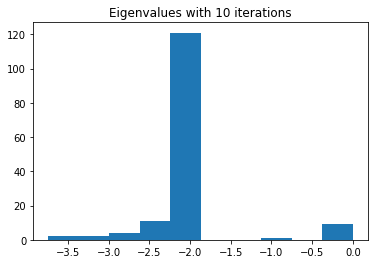

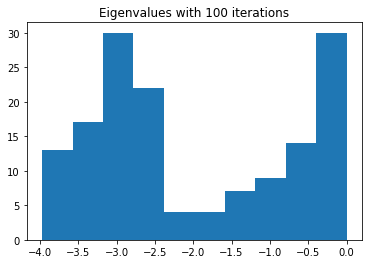

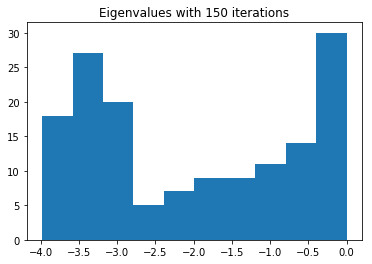

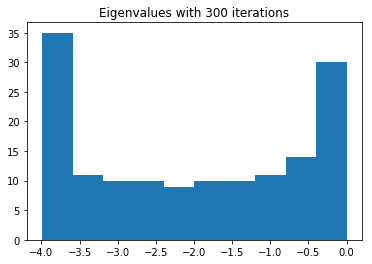

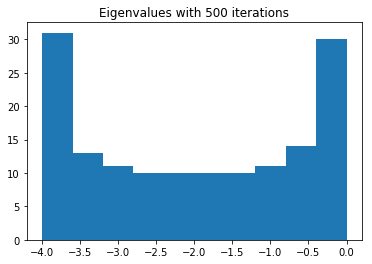

In [4]:
from scipy.sparse import diags
import scipy.linalg
import scipy as sp
import matplotlib.pyplot as plt


n = 150
A0 = diags([1, -2, 1], [-1, 0, 1], shape=(n, n)).toarray()
w, v = sp.linalg.eig(A)

plt.figure(0)
plt.title("True Eigenvalues")
plt.hist(w)

# Isnt this supposed to only take 150 itterations
iters = [10,100,150,300,500]


#Cycle through the iterations
for i in iters:
    #Reset the matrix A at the start of each iteration
    plt.figure(i)
    A = A0
    #Iterate baby
    for k in range(0,i):
        Q, R = sp.linalg.qr(A)
        A = R.dot(Q)
    #Find the eignvals
    calceig = []
    for j in range(0, A.shape[0]):
        calceig.append(A[j,j])
    plt.hist(calceig)
    plt.title("Eigenvalues with " + str(i) + " iterations")
    

In [1]:
# we should increase the resolution